# MAS DSE 200: Homework 2 - Pandas

#### Tasks:

- Submission on Gradescope:
  - Submit this Jupyter notebook to "Homework 2"


---

Remember: when in doubt, read the documentation first.

Python - https://docs.python.org/3/

NumPy - https://numpy.org/doc/stable/

pandas - https://pandas.pydata.org/docs/

## Instructions

* You don’t need to explain your approach (unless specified) so please be concise in your submission.
* To obtain full marks for a question, both the answer and the code should be correct.
* Completely wrong (or missing) code with correct answer will result in zero marks.
* Please code the solution in the space provided.

### Imports

Import necessary packages

In [102]:
!pip install pandas numpy requests pillow rasterio

In [103]:
import pandas as pd
import numpy as np
import requests
from pathlib import Path
from PIL import Image
from io import BytesIO
import rasterio
from rasterio.transform import from_bounds

## Part 1: Titanic

### Preliminaries

* Grab the dataset from `https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv` and store it in a pandas dataframe called `passengers`.

In [104]:
# YOUR CODE HERE
# download from https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv
with open('titanic.csv', 'wb') as f:
    response = requests.get('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv')
    f.write(response.content)


In [105]:
# open the csv file as a pandas dataframe
passengers = open('titanic.csv', 'r')
passengers = pd.read_csv(passengers)

In [106]:
passengers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1: Get to know your data - **20 points**

**1.1**: Print the first 15 entries in the dataframe to see what the columns are and what some values will look like - **5 points**

In [107]:
print(passengers.head(15))

    PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                

**1.2**: Next, set the index of the dataframe to the `PassengerId` column, and print the first 10 elements again to ensure the change took place - **5 points**

In [108]:
passengers = passengers.set_index('PassengerId')
print(passengers.head(10))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                          

**1.3**: How many samples are there in this dataset? - **5 points**

In [109]:
# YOUR CODE HERE
print("There are",passengers.shape[0],"samples in this dataset")

There are 891 samples in this dataset


**1.4** How many samples contain `null`/`NaN` in atleast one of the columns? - **5 points**

In [110]:
# YOUR CODE HERE
print("There are",passengers.isna().any(axis=1).sum(),"samples that contain null/NaN in atleast one of the columns")



There are 708 samples that contain null/NaN in atleast one of the columns


### 2: Summary statistics - **30 points**

**2.1**: Print the `min`, `max`, `mean` and `median` of age and fare of all passengers - **10 points**

Hint - Look at [`DataFrame.agg`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html#pandas.DataFrame.agg)

In [111]:
passengers.agg({'Age' : ['sum', 'min', 'max', 'mean', 'median'], 'Fare' : ['sum', 'min', 'max', 'mean', 'median']})

,Age,Fare
sum,21205.170000,28693.949300
min,0.420000,0.000000
max,80.000000,512.329200
mean,29.699118,32.204208
median,28.000000,14.454200


**2.2**: What is the average ticket fare price for male vs female passengers on the Titanic? - **10 points**

Note - The output should only have `Sex` and `Fare`

*Hint* - Look at [`DataFrame.groupby`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)

In [112]:
passengers.groupby('Sex')['Fare'].mean()


,Fare
Sex,
female,44.479818
male,25.523893


**2.3** What is the mean age for each of the sex and cabin class combinations? - **10 points**

In [113]:
passengers.groupby(['Sex', 'Cabin'])['Age'].mean()

Sex     Cabin
female  A16      48.000000
        B18      30.000000
        B20      17.000000
        B22      36.000000
        B28      50.000000
                   ...    
male    F G73    22.000000
        F2       13.833333
        F38            NaN
        F4        1.000000
        T        45.000000
Name: Age, Length: 171, dtype: float64

### 3:  Number of passengers in different classes - **20 points**

**3.1**: What is the number of passenges in different classes according to this dataset? (Hint: Pclass represents the class of a passenger.) - **5 points**

In [114]:
passengers['Pclass'].value_counts().sort_index()

,count
Pclass,
1,216
2,184
3,491


**3.2** How many passengers in 1st class (`Pclass = 1`) are women (`Sex = female`) above the age of 27? - **5 points**

In [115]:
len(passengers[(passengers['Pclass'] == 1) & (passengers['Sex'] == 'female') & (passengers['Age'] > 27)])

56

**3.3** What fraction of passengers from each class survived? (`Survived=1`) - **10 points**

In [116]:
passengers.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [117]:
passengers.groupby('Pclass')['Survived'].sum()/passengers.groupby('Pclass')['Survived'].count()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


### 4:  Fares - **30 points**

**4.1**: How many different fares were charged on the Titanic based on the dataset? - **5 points**

In [118]:
passengers.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [119]:
len(passengers['Fare'].unique())

248

**4.2**: Find the top 10 fares charged from the passengers. **Report these fare values**, and then **calculate the total number of passengers** who paid one of these top 10 fare amounts - **10 points**

In [120]:
top_10_fares = passengers['Fare'].value_counts().head(10)
top_10_fares



,count
Fare,
8.0500,43
13.0000,42
7.8958,38
7.7500,34
26.0000,31
10.5000,24
7.9250,18
7.7750,16
7.2292,15


**4.3**: Create a new dataset, called `passengers_filtered`, that includes only entries of passengers who paid one of these top 10 fares. **Report the number of samples** in the original dataset and in the new dataset to ensure the desired effect took place - **10 points**

**hint:** Check out the Pandas Series function [isin](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html)

In [121]:
passengers_filtered=passengers[passengers['Fare'].isin(top_10_fares)]
print("Number of samples in original dataset:",len(passengers))
print("Number of samples in new dataset:",len(passengers_filtered))


Number of samples in original dataset: 891
Number of samples in new dataset: 10


### 5:  Ages - **30 points**

**5.1**: What was the minimum, maximum and average age of passengers on the Titanic? - **5 points**

In [122]:
passengers.agg({'Age' : ['min', 'max', 'mean']})

,Age
min,0.420000
max,80.000000
mean,29.699118


**5.2**: How many passengers on the Titanic were within one standard deviation of the mean age calculated in **5.1**? - **10 points**

In [123]:
mean_age=passengers['Age'].mean()
std_age=passengers['Age'].std()
print("Mean age:", round(mean_age,2), "Std Dev age:",round(std_age,2))
lower_bound=mean_age-std_age
upper_bound=mean_age+std_age
print("Lower bound:", round(lower_bound,2), "Upper bound:",round(upper_bound,2))

pax_within=passengers['Age'].between(lower_bound, upper_bound).sum()
print(pax_within, "passengers are within 1 std dev of mean age")

Mean age: 29.7 Std Dev age: 14.53
Lower bound: 15.17 Upper bound: 44.23
516 passengers are within 1 std dev of mean age


**5.3**: How many of the passengers found in **5.2** were females over the age of 25? - **5 points**

In [124]:
filtered_passengers=passengers[passengers['Age'].between(lower_bound, upper_bound) & (passengers['Sex']=='female') & (passengers['Age']>25)]
print(len(filtered_passengers), "passengers were females over the age of 25")

103 passengers were females over the age of 25


**5.4**: What are the 10 **most** common ages of passengers according to this dataset? - **5 points**

In [125]:
top_10=passengers['Age'].value_counts().head(10)

top_10.index.tolist()


[24.0, 22.0, 18.0, 28.0, 30.0, 19.0, 21.0, 25.0, 36.0, 29.0]

## Part 2: Beer Review - 20 points

Use the `beer_reviews` dataframe created for you

In [126]:
reviews = []
response = requests.get("https://jmcauley.ucsd.edu/cse255/data/beer/beer_50000.json", verify=False)
for line in response.text.splitlines():
    reviews.append(eval(line))

beer_reviews = pd.DataFrame(reviews)

/usr/local/lib/python3.12/dist-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'jmcauley.ucsd.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


**6.1**: Which are the top 15 beers with the highest average ratings (`review/overall`)? - **10 points**

In [127]:
print(beer_reviews.columns)

Index(['review/appearance', 'beer/style', 'review/palate', 'review/taste',
       'beer/name', 'review/timeUnix', 'beer/ABV', 'beer/beerId',
       'beer/brewerId', 'review/timeStruct', 'review/overall', 'review/text',
       'user/profileName', 'review/aroma', 'user/gender', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/ageInSeconds'],
      dtype='object')


In [128]:
top_15_beers=beer_reviews.groupby('beer/name')['review/overall'].mean().sort_values(ascending=False).head(15)
top_15_beers.index.tolist()

['Pots Ale',
 'One Hop Wonder Version 12',
 'Oak Aged Los Diablos Del Paso',
 'Saisonnaire',
 'Schwindel Alt',
 'Marzen',
 'Limping Mallard',
 'Javaspresso Nitro Stout',
 'Hops Bandit',
 'Imperial Red Ale',
 'Honey Wheat',
 'Honey Badger',
 "Gene's American Brown Ale",
 "Ackerman's Imperial Double Stout (Winterfest Replicale 2011)",
 'Sub Zero Lager']

**6.2**: Which of the following - `review/palate`, `review/taste`, `review/aroma`, length of `review/text`(number of words in the review text) - correlate highest with `review/overall`? - **10 points**

NOTE - `review/text` is of type string while the other reviews are of type float. Use the length of `review/text` instead. You may need to create a new column in the data frame

In [129]:
beer_reviews['review/text_length']=beer_reviews['review/text'].str.len()
cols = [
    'review/overall',
    'review/palate',
    'review/taste',
    'review/aroma',
    'review/text_length'
]
corr=beer_reviews[cols].corr()
print(corr['review/overall'])
print('Review/taste has highest correlation with review/overall')

review/overall        1.000000
review/palate         0.695278
review/taste          0.784999
review/aroma          0.615361
review/text_length    0.090122
Name: review/overall, dtype: float64
Review/taste has highest correlation with review/overall


## Part 3: Geospatial Data - 10 points

In [130]:

data_dir = Path('fire_data')
data_dir.mkdir(exist_ok=True)

In [131]:
# Select a new area
# http://bboxfinder.com/#-117.500249,32.665157,-116.820470,33.012173
# Go to the above link and select an area of interest
# Example bbox for San Diego area: [-117.500249, 32.665157, -116.820470, 33.012173]
bbox = [-117.500249, 32.665157, -116.820470, 33.012173]

print(f"Study Area Bounding Box: {bbox}")
print(f"Longitude: {bbox[0]:.2f} to {bbox[2]:.2f}")
print(f"Latitude: {bbox[1]:.2f} to {bbox[3]:.2f}")

Study Area Bounding Box: [-117.500249, 32.665157, -116.82047, 33.012173]
Longitude: -117.50 to -116.82
Latitude: 32.67 to 33.01


In [132]:
def get_naip_imagery(bbox, output_path):
    """
    Fetch NAIP imagery - simple version
    Always gets 1024x1024 pixels, no calculations
    """
    base_url = "https://imagery.nationalmap.gov/arcgis/rest/services/USGSNAIPImagery/ImageServer/exportImage"

    params = {
        'bbox': f"{bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}",
        'bboxSR': '4326',
        'size': '1024, 1024',
        'imageSR': '4326',
        'format': 'tiff',  # Get TIFF to preserve all bands
        'pixelType': 'U16',
        'f': 'image'
    }

    print(f"Requesting NAIP imagery: 1024x1024 pixels")
    response = requests.get(base_url, params=params, timeout=120)

    if response.status_code == 200:
        # Save directly - no conversion needed
        with open(output_path, 'wb') as f:
            f.write(response.content)

        print(f"✓ NAIP imagery saved to {output_path}")
        return True
    else:
        print(f"Error fetching NAIP: {response.status_code}")
        return False


# Use it
naip_file = data_dir / 'naip_imagery.tiff'
print("Downloading NAIP imagery...")
success = get_naip_imagery(bbox, naip_file)

if success:
    # Check what we got
    with rasterio.open(naip_file) as src:
        print(f"Bands: {src.count}")
        print(f"Size: {src.width}x{src.height}")

Requesting NAIP imagery: 1024x1024 pixels
✓ NAIP imagery saved to fire_data/naip_imagery.tiff
Bands: 4
Size: 1024x1024


### Task - Geospatial Data Analysis - 10 points

Based on the NAIP imagery data you've downloaded, create your own analytics to explore the geospatial data.

**Requirements (10 points total):**
1. **Visualize the imagery** (3 points) - Display the RGB bands properly
2. **Identify color patterns** (3 points) - Create masks to identify 2 colors (e.g., green for vegetation, brown for bare soil) or any other colors of your choice
3. **Analyze spatial patterns** (4 points) - Use your color masks to calculate statistics (e.g., percentage of green vs brown areas, spatial distribution)

You should create 3 different visualizations or analyses demonstrating your understanding of geospatial data manipulation with pandas and rasterio.

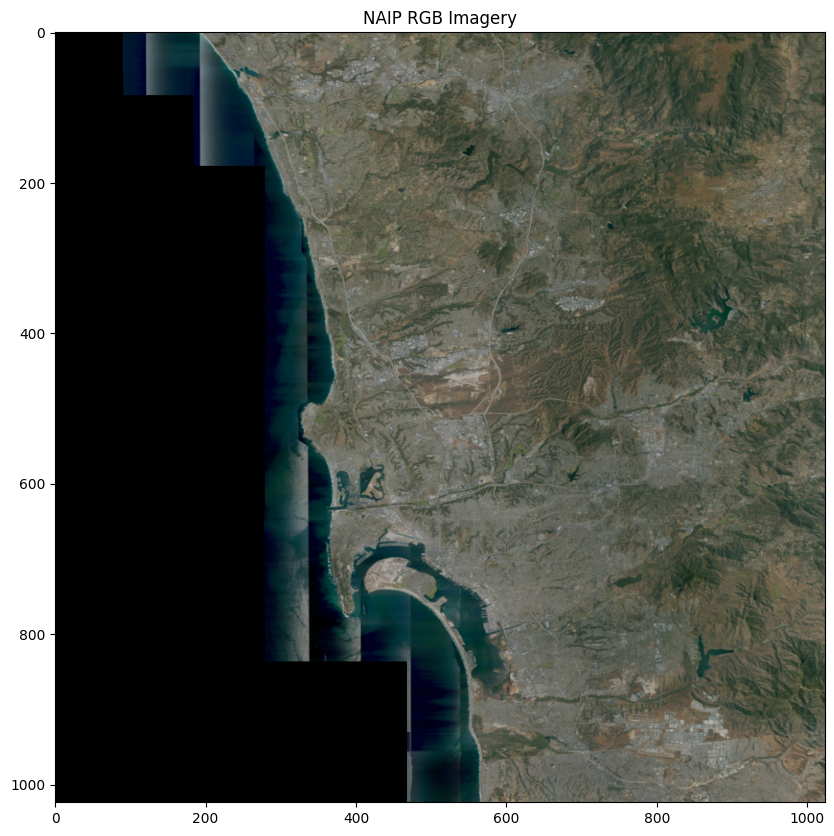

In [133]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open(naip_file) as src:
  #Read first 3 bands (Red, Green, Blue)
  img = src.read([1,2,3])
  #Reorder from (bands, rows, cols) to (rows, cols, bands)
  img = img.transpose(1, 2, 0)

  plt.figure(figsize=(10, 10))
  plt.imshow(img)
  plt.title("NAIP RGB Imagery")
  plt.show()
src.close()



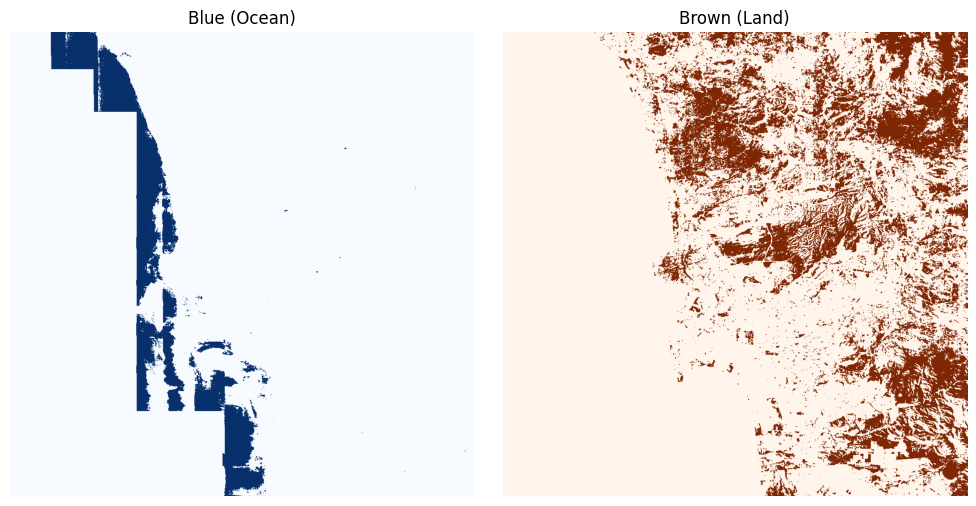

In [138]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt


with rasterio.open(naip_file) as src:
    img = src.read([1, 2, 3]).astype(float)
    img = img.transpose(1, 2, 0)

# normalize 0–1
img = img / img.max()


# simple masks
mask_blue = ((B > 0.25) & (B > R * 1.05) & (B > G * 1.05)) | \
            ((B / (R + 1e-6) > 1.1) & (B / (G + 1e-6) > 1.05))
mask_brown = (R > 0.35) & (R > B * 1.2) & (G > B)


# show masks
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(mask_blue, cmap="Blues")
plt.title("Blue (Ocean)")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(mask_brown, cmap="Oranges")
plt.title("Brown (Land)")
plt.axis("off")
plt.tight_layout()
plt.show()


In [141]:
total_pixels = mask_blue.size
blue_pixels  = mask_blue.sum()
brown_pixels = mask_brown.sum()

pct_blue  = (blue_pixels / total_pixels) * 100
pct_brown = (brown_pixels / total_pixels) * 100

print(f"Blue area:  {pct_blue:.2f}%")
print(f"Brown area: {pct_brown:.2f}%")

Blue area:  6.82%
Brown area: 20.01%
